# Lesson 1 Assignment - EnergyLoads
## Author - Kenji Oman

### Instructions
In this exercise you will use visualization and summary statistical methods to explore a data set. You will be looking for interesting aspects in these data. Specifically, you will explore an energy efficiency data set.

This data set contains characteristics of over 750 buildings. The efficiency of the building is measured as either heating load or cooling load. Your goal is to find **three interesting relationships within the variables** which help you understand the energy efficiency of these buildings.

The exercise is deliberately open-ended. Whenever you approach a new data set there some open-ended exploration is required. Expect this exploration to be an iterative process. You may need to try several ideas before you find truly interesting relationships.

The key points come from examining charts and summary statistics based on distribution Heating Load and Cooling Load. 
<font color="blue">At the end of this notebook include Markdown cells outlining your 3 key points.</font>

Example description:  The heating load of buildings depends on ... Evidence for this relationship can be seen by ... in the figure and by noting .... in the table above. 


#### Tip: 
There are no categorical variables in this data set. There are two numeric variables, Orientation and Glazing Area Distribution with only 4 and 2 discrete values. You can convert these integer values to factors and examine the effect on the distribution of Heating Load and Cooling Load.

## Imports, setup, and file import/ integrity check

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from IPython.display import display

In [2]:
# Cleaned up Dataset location
fileName = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/EnergyEfficiencyData.csv"

# Ingest the data
df = pd.read_csv(fileName)
# And peak at it
df.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


Looks like we did indeed have column headers, and the defaults on read_csv seem to have done a good job.  However, we notice spaces in the column headers, this makes it harder to access by column later, so let's replace with underscores.

In [3]:
# Replace spaces in column names with underscores
df.columns = [x.replace(' ', '_') for x in df.columns]

In [4]:
# Verify that all columns are numeric type (and not that there was some issues with it being a ', ' separated
# dataset, instead of just comma)
df.dtypes

Relative_Compactness         float64
Surface_Area                 float64
Wall_Area                    float64
Roof_Area                    float64
Overall_Height               float64
Orientation                    int64
Glazing_Area                 float64
Glazing_Area_Distribution      int64
Heating_Load                 float64
Cooling_Load                 float64
dtype: object

All columns were of numeric type, so looks like we don't have any issues with some values being interpreted as a string.

In [5]:
# Check for missing values
df.isnull().any()

Relative_Compactness         False
Surface_Area                 False
Wall_Area                    False
Roof_Area                    False
Overall_Height               False
Orientation                  False
Glazing_Area                 False
Glazing_Area_Distribution    False
Heating_Load                 False
Cooling_Load                 False
dtype: bool

We find that we didn't have any missing values, so it really looks like this dataset has been cleaned up!  Now, let's look at the data directly.
## EDA

In [6]:
# First, let's look at the summary statistics of the columns
df.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


Without a data dictionary, it is hard to know what exactly these columns mean (how does surface area relate to wall and roof area, for example). Orientation and Glazing Area Distribution were ints, so these are likely actually categoricle variables encoded as ints (I would assume Orientation relates to the directions North, South, East, West), so let's take a look real quick at that.

*Note, I later re-read the description above, and now see that the description is claiming Orientation and Glazing Area Distribution are **not** actually ints ...*

'Unique Orientations: [2 3 4 5]'

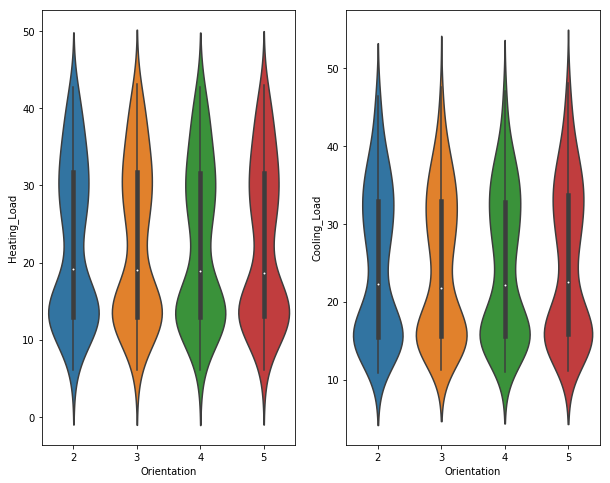

In [7]:
# Take a look at Orientation to see if this might relate to the compass directions
display("Unique Orientations: {}".format(df.Orientation.unique()))

# Let's also see how this relates to heating and cooling loads
f = plt.figure(figsize=(10,8))
ax = f.add_subplot(121)
sns.violinplot(x='Orientation', y='Heating_Load', data=df, ax=ax)
ax= f.add_subplot(122)
sns.violinplot(x='Orientation', y='Cooling_Load', data=df, ax=ax)
plt.show()

It's hard to tell if there is much of an impact, but it vaguely looks like Orientation 2 facing buildings have slightly higher Heating and Cooling loads, and these taper down for Orientation 3, 4, to 5.  Also, it looks like there are two groups of buildings based on Heating and Cooling loads, so let's go back out and look at the distributions of all the data with each other.

### Scatter Matrix

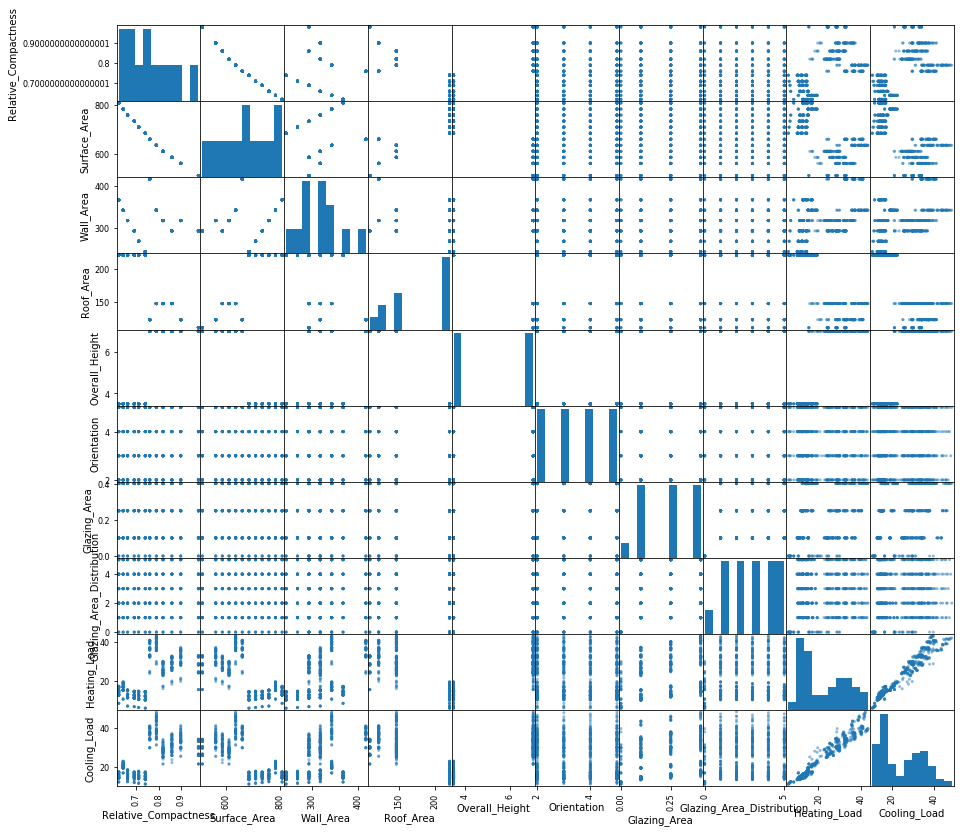

In [8]:
# Make a Scatter matrix to view relationships between all data
pd.plotting.scatter_matrix(df, figsize=(15,14))
plt.show()

It looks like there really are two distributions of buildings within Heating and Cooling load (looking at their histograms, there seems to be a split at ~20 units between the two groups).  This split seems to correlate fairly well with Overall height, and to some degree, Roof Area, Surface Area, and Relative Compactness.  Also, as expected, heating and cooling loads are positively correlated to each other.  Let's look at the correlation values to see how variables might co-vary with heating and cooling loads.

### Correlation matrix

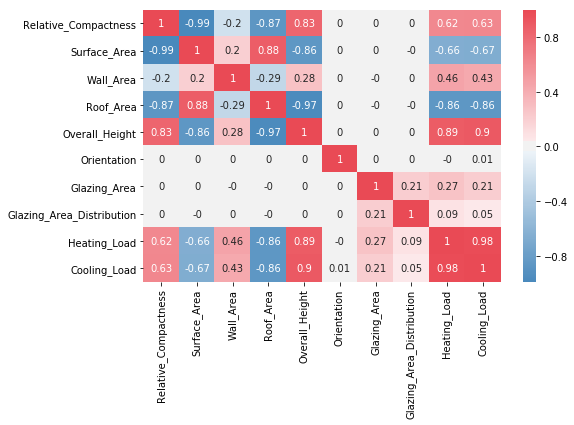

In [9]:
# Let's look at the covariance matrix
f = plt.figure(figsize=(8,5))
ax = f.add_subplot(111)
cmap = sns.diverging_palette(242, 10, l=55, as_cmap=True)
sns.heatmap(df.corr().round(2), cmap=cmap, annot=True, ax=ax)
plt.show()

From the above, it does indeed look like the Heating and Cooling Loads are most correlated to Overall Height, Roof Area, Surface Area, and Relative Compactness, in that order.  Let's try to see which feature vectors are most similar to the Heating and Cooling Loads by clustering the vectors to each other.

### ClusterMaps

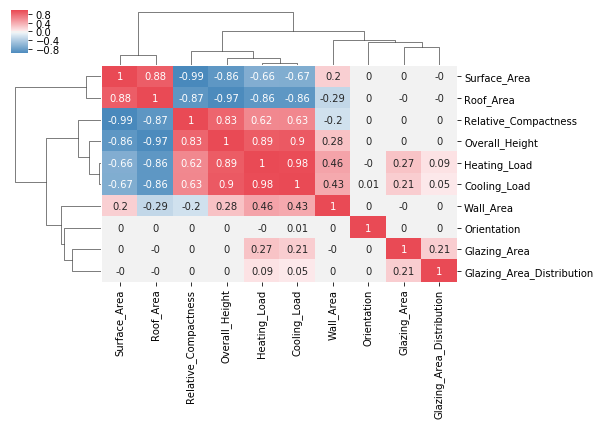

In [10]:
sns.clustermap(df.corr().round(2), cmap=cmap, annot=True, figsize=(8,5))
plt.show()

Although the above seems to have done a fairly good job of clustering things that correlate well together, Surface Area and Roof Area, which are anti-correlated as a correlation feature vector, show up far away from heating and cooling, even though they are strongly anti-correlated.  So, let's look at the clustering, looking at distance on absolute correlations (just the strength of the correlation, not the direction).

#### Clustermap of absolute correlations

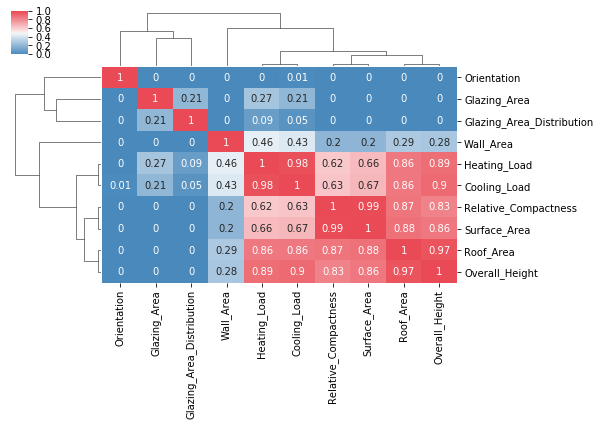

In [11]:
sns.clustermap(df.corr().round(2).abs(), cmap=cmap, annot=True, figsize=(8,5))
plt.show()

From the above, we see that, when we ignore the parity of the corelation (whether something is correlated or anti-correlated), we now have Relative Compactness being very similar to Surface Area, and Roof Area similar to Overall Height.

### Re-ordered Scatter Matrix

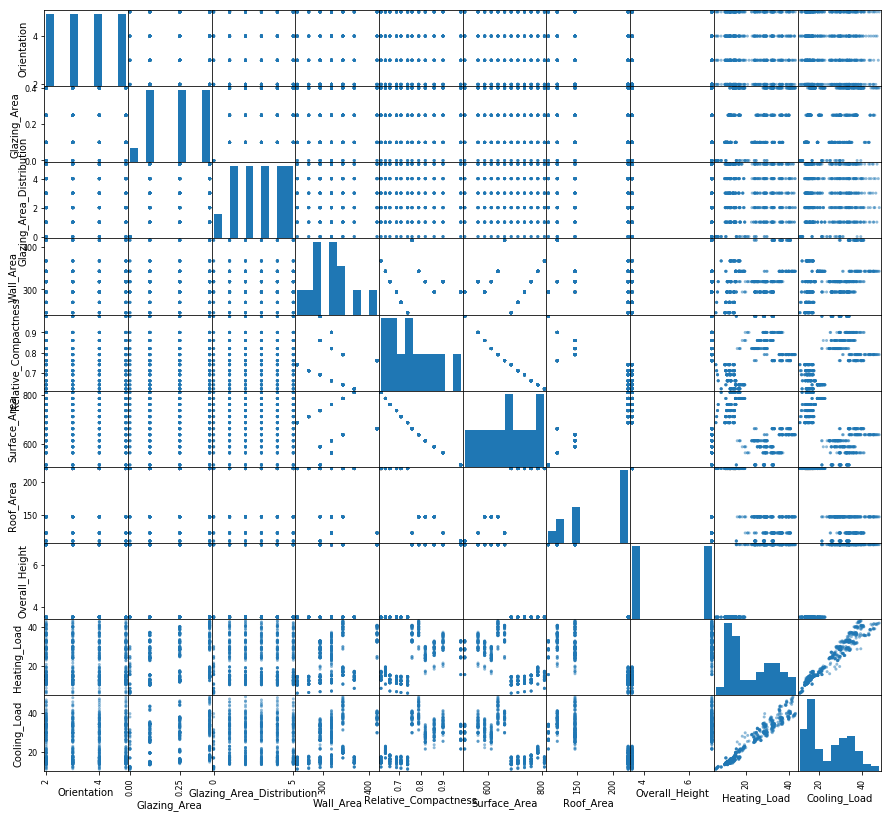

In [12]:
# Let's plot the scatter matrix again with the same column order as the above, except put heating and cooling load at the end
col_order = 'Orientation Glazing_Area Glazing_Area_Distribution Wall_Area Relative_Compactness Surface_Area Roof_Area Overall_Height Heating_Load Cooling_Load'.split()
pd.plotting.scatter_matrix(df[col_order], figsize=(15,14))
plt.show()

## Summary of Observations
From the above, we see that:
1. (See either Scatter Matrix above) Heating and Cooling Load are highly correlated with each other (fairly linear, but we could explore the functional shape further)
2. (See either ClusterMap) Orientation is *really* not correlated to Heating/Cooling Load, and there is minimal correlation of Glazing Area and the Glazing Area Distribution (although of the two, Glazing Area is more correlated, explaining ~21-27% of the variance of Heating/ Cooling Load)
3. (See either ClusterMap) Overall Height, Roof Area, Surface Area, and Relative Compactness are fairly well correlated (or anti-correlated) with the Heating and Cooling Load in a building.
4. (See Scater Matrix above) the relationships between the features from 3. have complex (non-linear) relationships with Heating/ Cooling Load (with the possible exception of Overall Height, but with only two values, it is hard to describe the function).

## Conclusions
Based on the summary, we could:
1. Drop either Heating or Cooling Load (as these are so closely correlated to each other), but we would want to pick which based on our business application -- am I selling air conditioners, or heaters?, etc)
2. Drop one from each of the pairs of Roof Area or Overall Height, and Relative Compactness or Surface Area, as within each pair, the items are highly anti-correlated with each other (ok, this wasn't exactly mentioned in my above summary, but can be seen with the correlation values of -.99 and -.97, respectively).
3. Drop Orientation, Glazing Area Distribution, and perhaps even Glazing Area, as these are not really related to any of the other features, and don't relate well with Heating/ Cooling Load either.